<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch04_03_%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9CEDA_penguins_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03. 분류문제 EDA - penguins
---
* 날짜: 2022-05-11
* 이름: 김민규

## 학습내용
    - penguins 데이터 EDA
    - 분류문제 에서의 탐색적 데이터 분석 진행


## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* seaborn에서 제공하는 `penguins` 데이터셋을 불러오기

In [ ]:
df = sns.load_dataset('penguins')
df.shape

(344, 7)

* 데이터셋 일부 확인

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [ ]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

* 결측지 비율 확인

In [ ]:
df.isna().mean()*100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* 숫자 자료형의 기술 통계

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


* 숫자 자료형 외의 기술 통계

In [ ]:
df.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for col in ['species','island','sex']:
    print(col)
    print(df[col].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
sex
Male      168
Female    165
Name: sex, dtype: int64


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

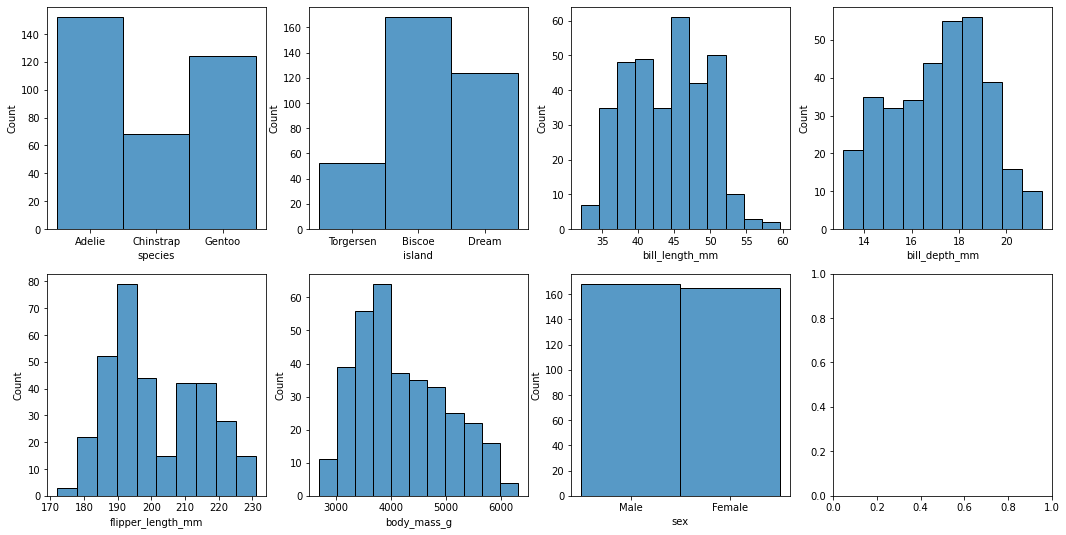

In [ ]:
f, axes = plt.subplots(2,4, figsize=(18,9))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
    sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [ ]:
nums = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] # 연속형
noms = ['species', 'island', 'sex'] # 범주형
y ='penguins'
print('숫자/연속형', nums)
print('범주 자료형', noms)
print('예측할 속성/변수',y)

숫자/연속형 ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
범주 자료형 ['species', 'island', 'sex']
예측할 속성/변수 penguins


* 데이터 정리하기
  * 데이터 소개: 3가지 다른 종의 펭귄들을 구분하는 것 입니다.
  * 자료형 소개
  * 모델링을 위한 자료형 구분:
  
  1. 숫자/연속형 ['bill_length_mm(부리의 길이)', 'bill_depth_mm(부리의 너비)', 'flipper_length_mm(날개의 길이)', 'body_mass_g(몸무게)']

  2. 범주 자료형 ['species(종<예측 해야할 값)', 'island(거주지)', 'sex(성별)']

  3. 예측할 속성/변수 penguins



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

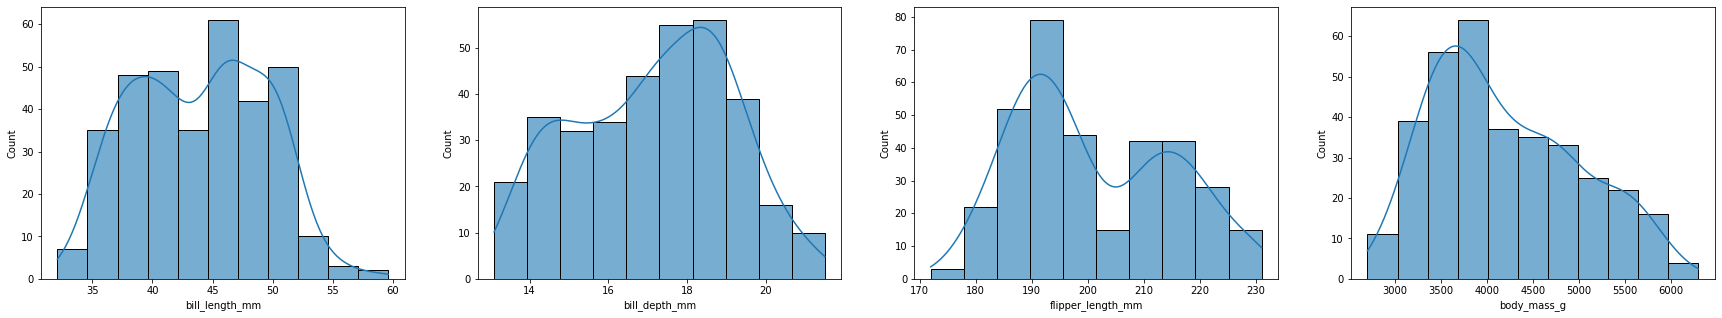

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,5))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.histplot(data = df, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

* 이산 자료형 분포 그리기

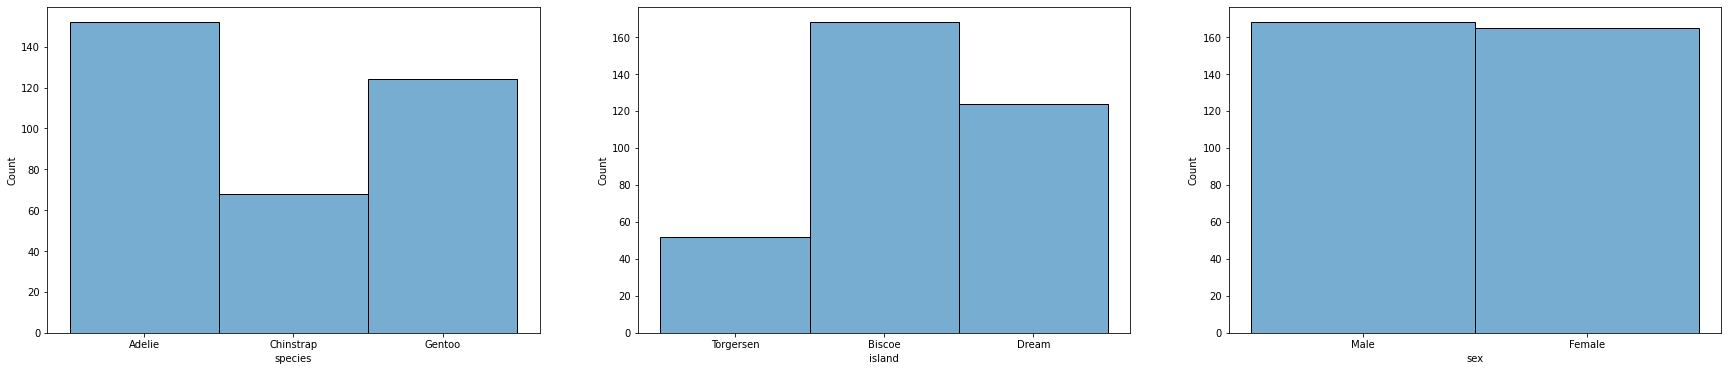

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(30,6))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.histplot(data = df, x=col, ax=ax, alpha=0.6,)
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* boxplot 으로 연속 자료형 기술 통계 시각화하기

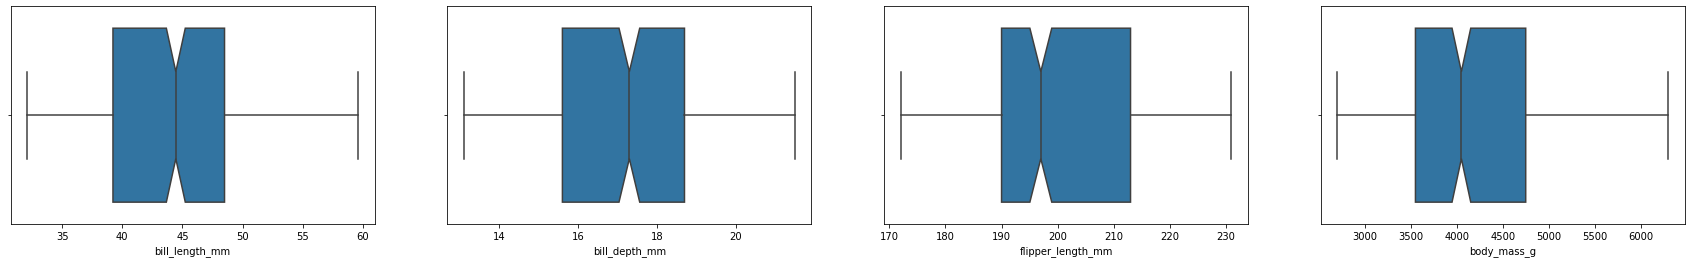

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,4))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.boxplot(data = df, x=col, ax=ax, notch=1, sym='rs')
plt.show()

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

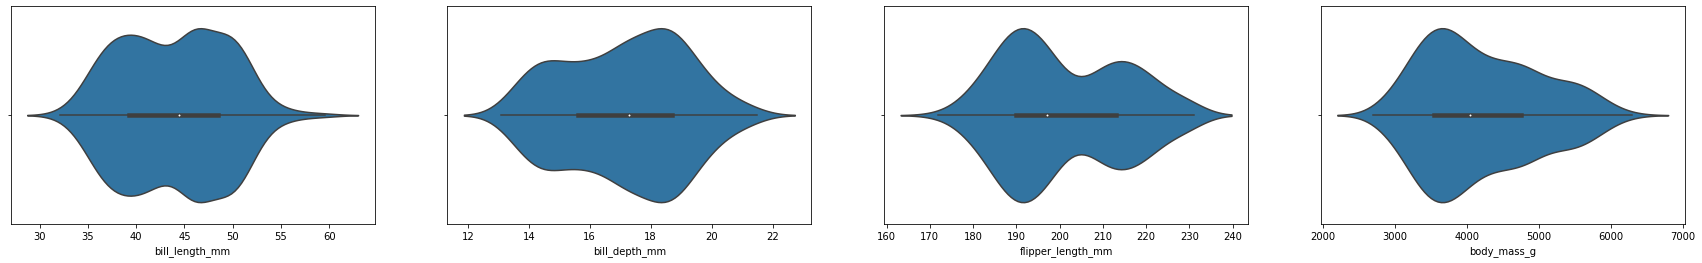

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,4))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.violinplot(data = df, x=col, ax=ax, )
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

* `kurt` 이용해 첨도 구하기

In [ ]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bill_length_mm      -0.876027
bill_depth_mm       -0.906866
flipper_length_mm   -0.984273
body_mass_g         -0.719222
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기


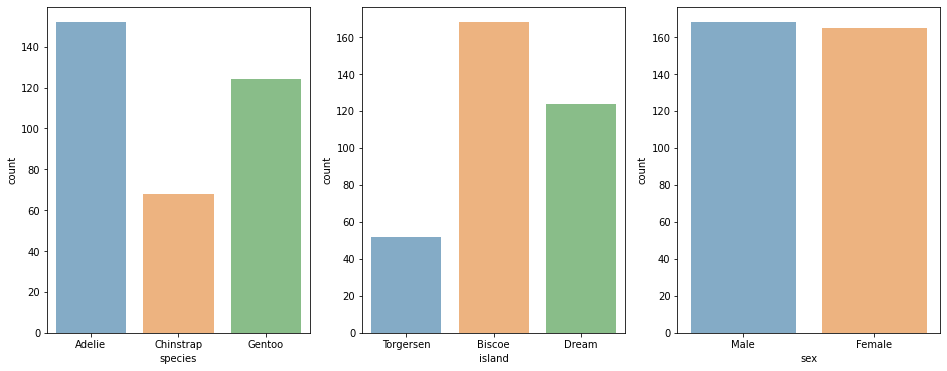

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(16,6))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.countplot(data = df, x=col, ax=ax, alpha=0.6,)
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()

* `hue` 옵션에 범주형 속성 추가하기

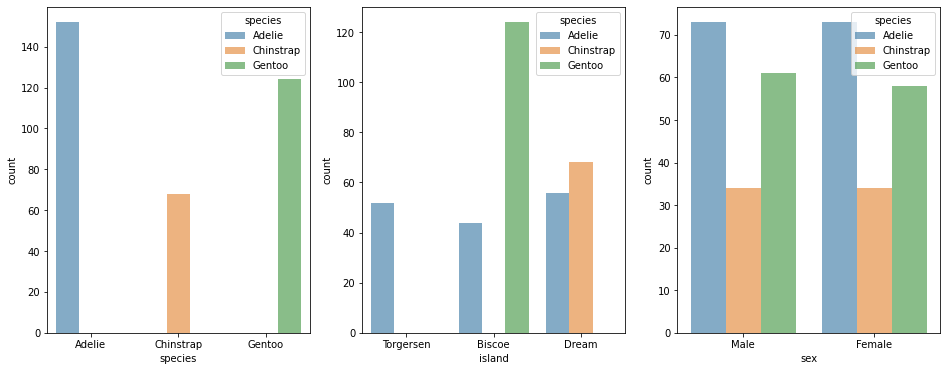

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(16,6))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.countplot(data = df, x=col, ax=ax, alpha=0.6,hue='species')
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()
# species, island, sex

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [ ]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

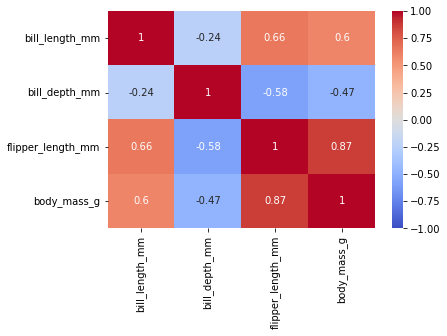

In [ ]:
_=sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

* 상관관계가 높은 속성 정리하기




In [ ]:
# 정리
# 몸무게와 날개길이가 상관관계가 높습니다.

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

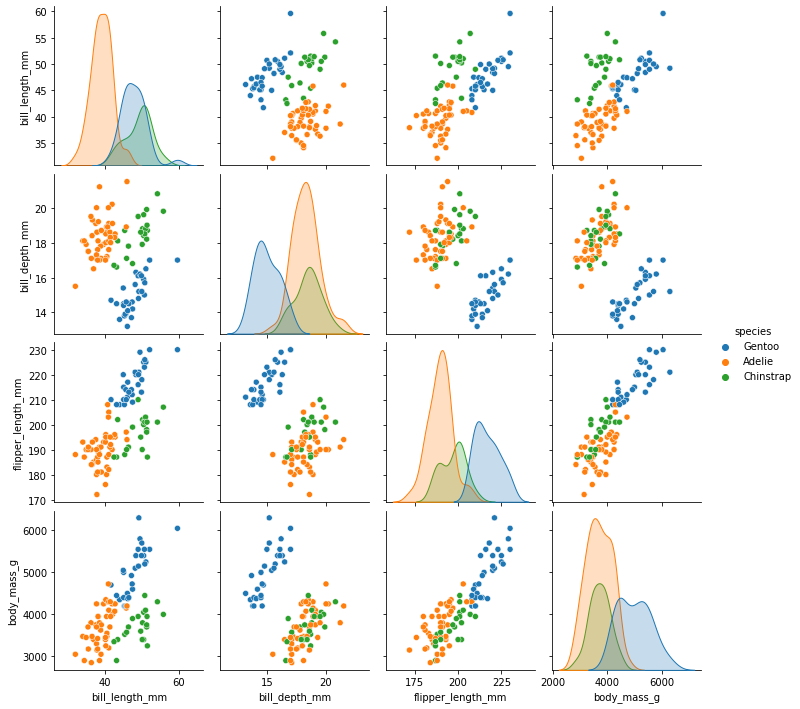

In [ ]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
_=sns.pairplot(df.sample(100), hue='species')

* `kdeplot` 이용해 연속 자료형 별 예측값의 분포 시각화 하기

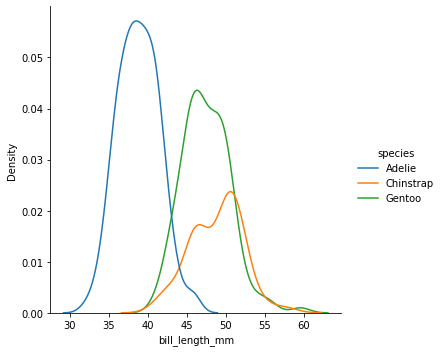

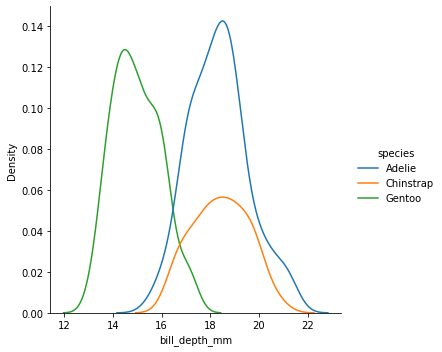

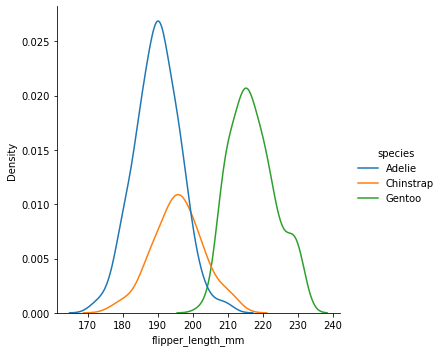

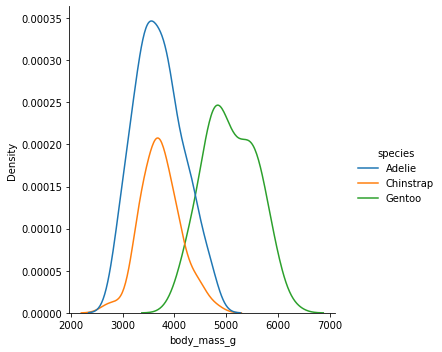

In [ ]:
for col in nums:
    sns.displot(data=df, x=col, kind='kde',hue='species')
    plt.show()

* 위에서 그린 플롯에 `col` 옵션으로 `island` 추가하기

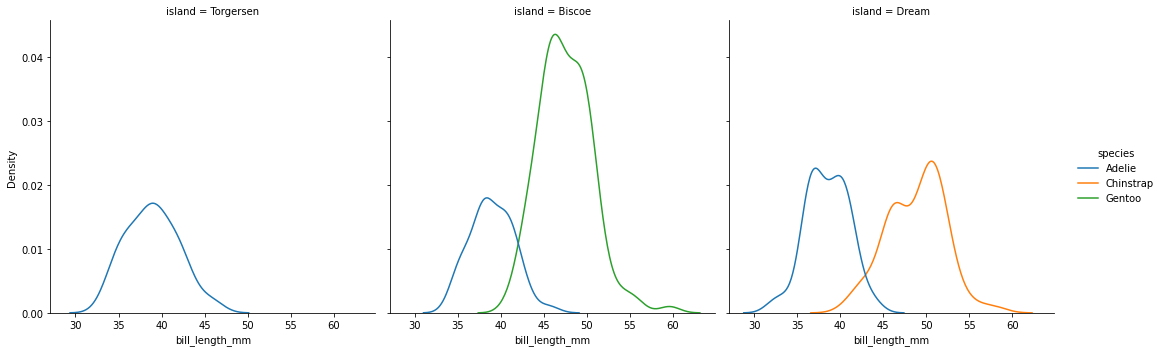

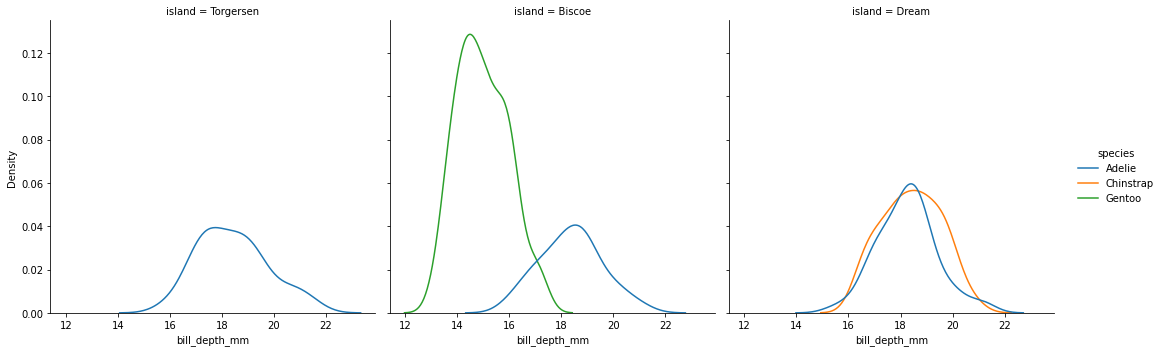

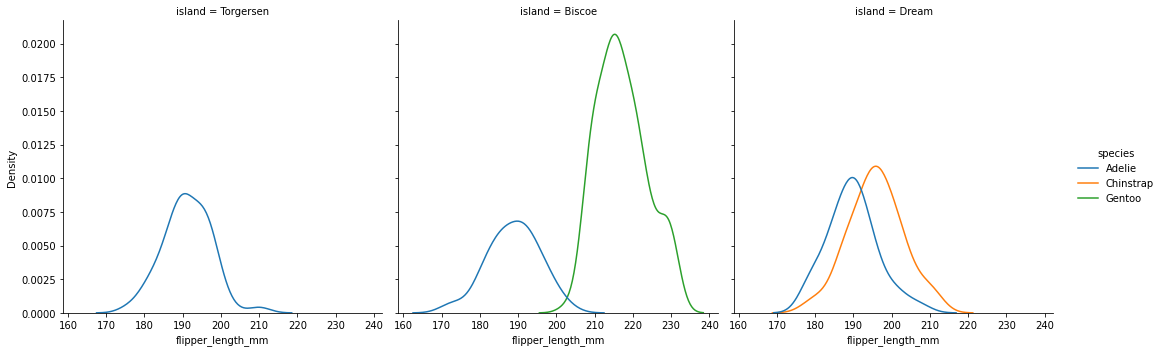

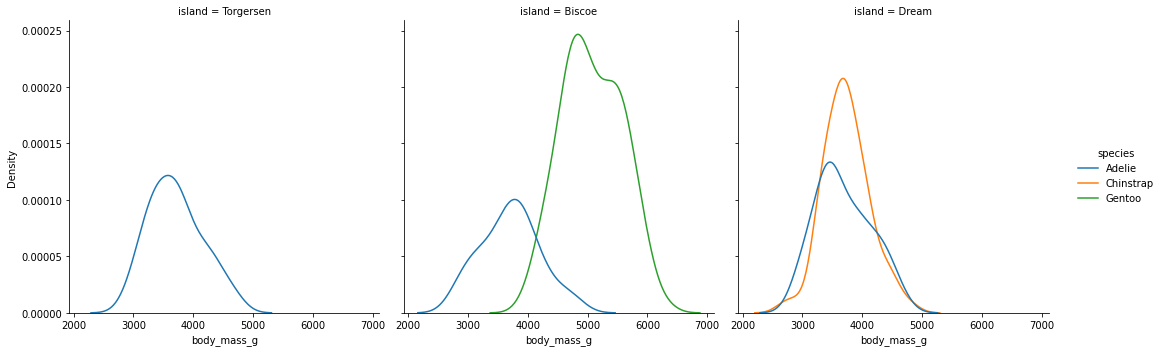

In [ ]:
for col in nums:
    sns.displot(data=df, x=col, kind='kde',hue='species',col='island')
    plt.show()

* `bill_length_mm`과 `bill_depth_mm`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

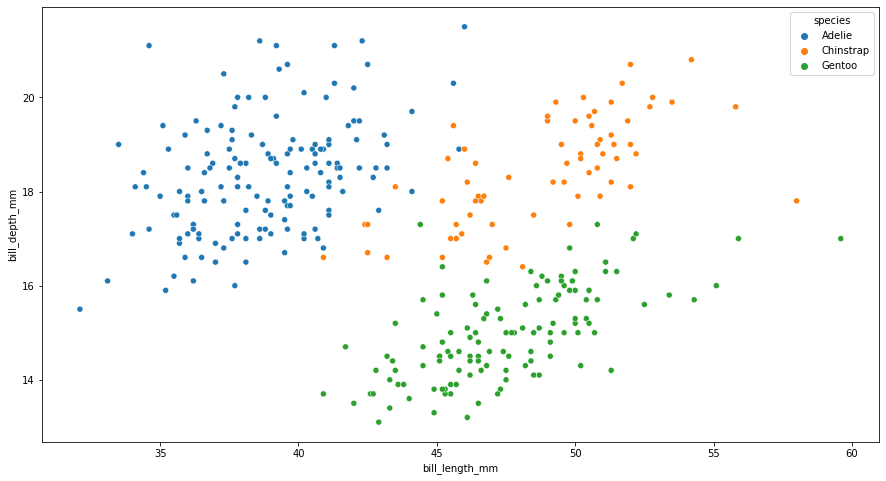

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='bill_length_mm', y ='bill_depth_mm',hue='species')

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `island` 추가하기

<Figure size 1080x576 with 0 Axes>

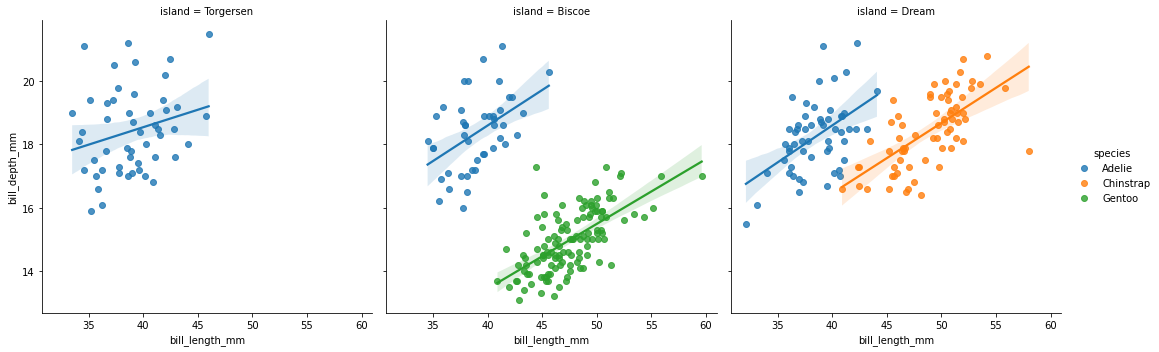

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df, x='bill_length_mm', y ='bill_depth_mm',hue='species',col='island')

* `flipper_length_mm`, `body_mass_g`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

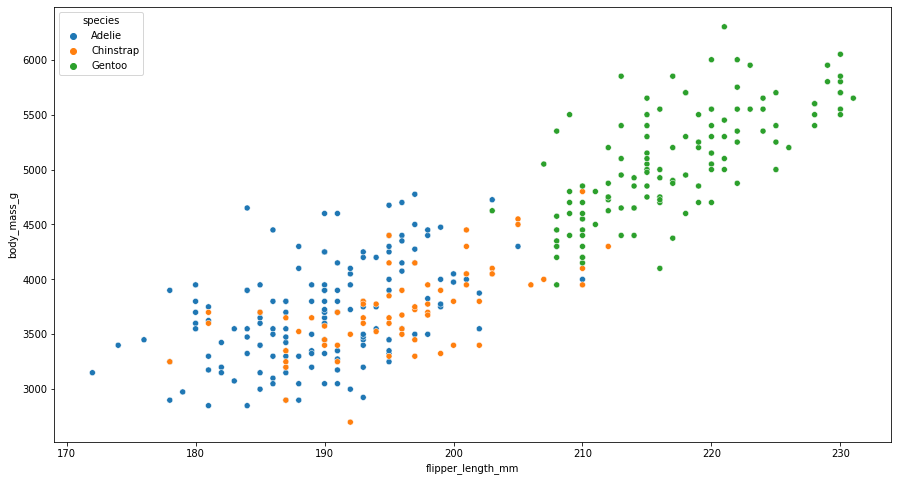

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='flipper_length_mm', y ='body_mass_g',hue='species')

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `island` 추가하기

<Figure size 1080x576 with 0 Axes>

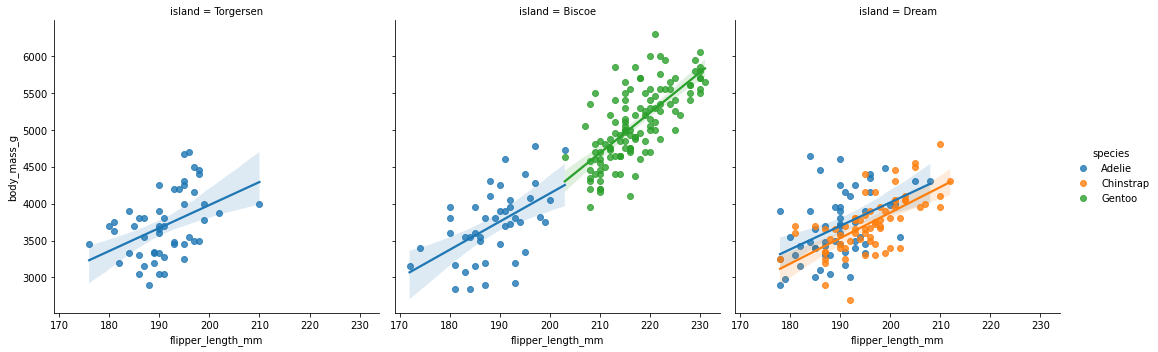

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df, x='flipper_length_mm', y ='body_mass_g',hue='species',col='island')

* `histplot`으로 범주형 속성들과 예측값 히트맵 그리기

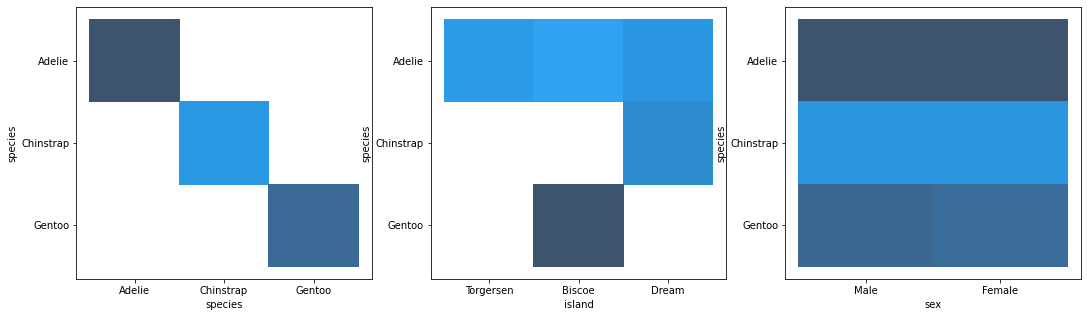

In [ ]:
fig, axes = plt.subplots(1, len(noms), figsize=(18,5))
for col, ax in zip(noms, axes):
    _=sns.histplot(data=df, x=col, y='species' ,ax=ax)

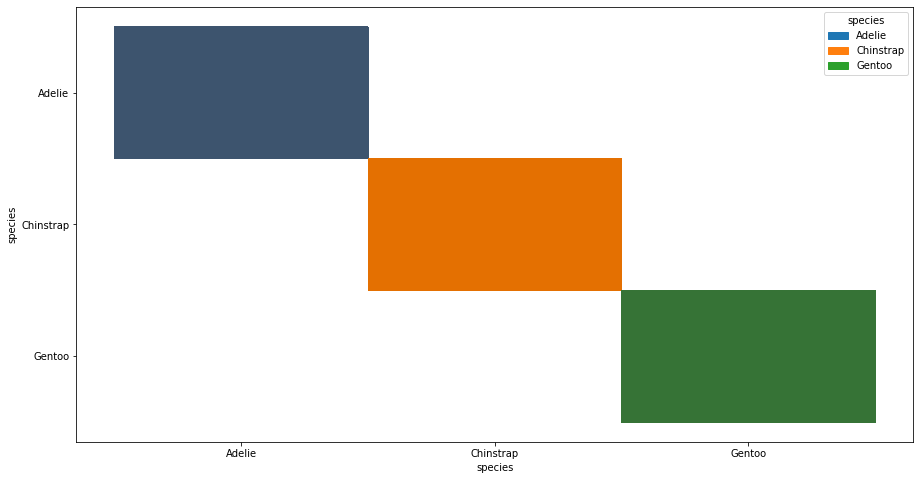

In [ ]:
# x는 번주/연속, y는 연속(개수)
# 지금은 x 범주, y 범주(예측값)
plt.figure(figsize=(15,8))
sns.histplot(data=df, x=noms[0], y ='species',hue='species')

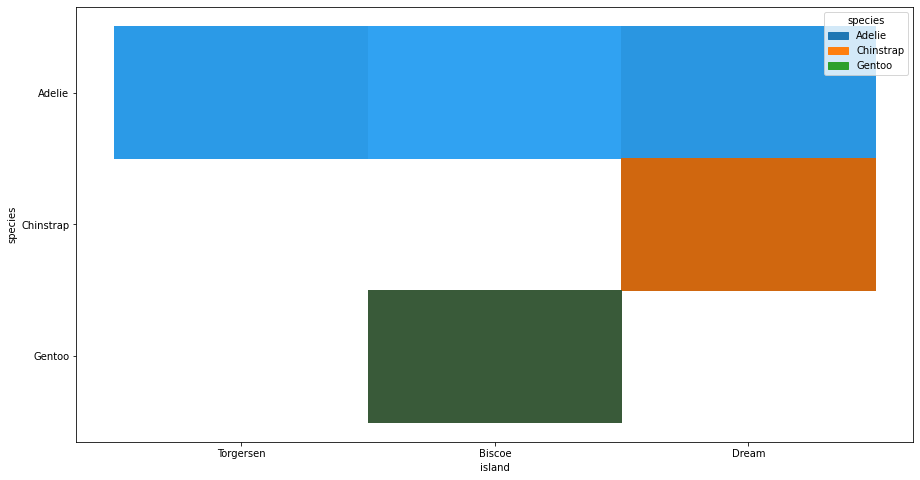

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x=noms[1], y ='species',hue='species')

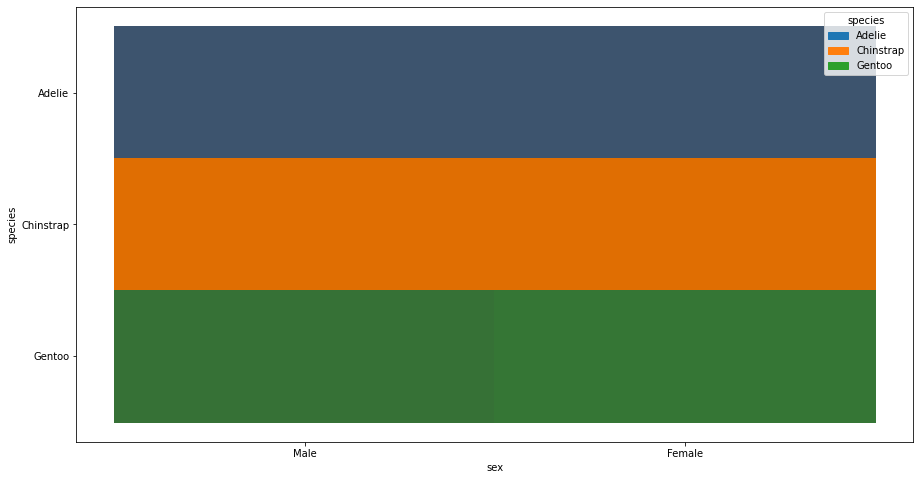

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x=noms[2], y ='species',hue='species')